Movie recommendation system

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
#User ratings dataframe
ratings=pd.read_csv("./ml-100k/u.data",sep="\t",names=["user_id","movie_id","rating","timestamp"])
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
#Movies dataframe
columns=["movie_id","title","release_date","video_release_date","imdb_url","unknown",
         "Action","Adventure","Animation","Children\'s","Comedy","Crime","Documentary",
         "Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
         "Thriller","War","Western"]
movies=pd.read_csv("./ml-100k/u.item",sep="|",names=columns,encoding='latin1')
print(movies.head())

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0

In [4]:
#Users dataframe
users=pd.read_csv("./ml-100k/u.user",sep="|",names=["user_id","age","gender","occupation","zip_code"])
print(users.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [5]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [6]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [7]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [8]:
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [9]:
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [10]:
movies.isnull().sum()

movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [11]:
print(movies.loc[movies["release_date"].isnull()])

     movie_id    title release_date  video_release_date imdb_url  unknown  \
266       267  unknown          NaN                 NaN      NaN        1   

     Action  Adventure  Animation  Children's  ...  Fantasy  Film-Noir  \
266       0          0          0           0  ...        0          0   

     Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266       0        0        0        0       0         0    0        0  

[1 rows x 24 columns]


In [12]:
print(movies[movies["title"]=="unknown"])
movies=movies[movies["title"]!="unknown"]
print("Removed movie with unknown title, genre and release date")

     movie_id    title release_date  video_release_date imdb_url  unknown  \
266       267  unknown          NaN                 NaN      NaN        1   

     Action  Adventure  Animation  Children's  ...  Fantasy  Film-Noir  \
266       0          0          0           0  ...        0          0   

     Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266       0        0        0        0       0         0    0        0  

[1 rows x 24 columns]
Removed movie with unknown title, genre and release date


In [13]:
movies.drop(columns=["video_release_date"], inplace=True)   #remove video release date as all are null

In [14]:
print(movies.isnull().sum())

movie_id        0
title           0
release_date    0
imdb_url        2
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


In [15]:
movies["imdb_url"]=movies["imdb_url"].fillna(value="none")   #Fill the missing url with a value none
movies.isnull().sum()

movie_id        0
title           0
release_date    0
imdb_url        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1681 non-null   int64 
 1   title         1681 non-null   object
 2   release_date  1681 non-null   object
 3   imdb_url      1681 non-null   object
 4   unknown       1681 non-null   int64 
 5   Action        1681 non-null   int64 
 6   Adventure     1681 non-null   int64 
 7   Animation     1681 non-null   int64 
 8   Children's    1681 non-null   int64 
 9   Comedy        1681 non-null   int64 
 10  Crime         1681 non-null   int64 
 11  Documentary   1681 non-null   int64 
 12  Drama         1681 non-null   int64 
 13  Fantasy       1681 non-null   int64 
 14  Film-Noir     1681 non-null   int64 
 15  Horror        1681 non-null   int64 
 16  Musical       1681 non-null   int64 
 17  Mystery       1681 non-null   int64 
 18  Romance       1681 non-null   int64 
 19  Sci-Fi     

In [17]:
movies["release_date"]=pd.to_datetime(movies["release_date"])
print(movies["release_date"].head())

0   1995-01-01
1   1995-01-01
2   1995-01-01
3   1995-01-01
4   1995-01-01
Name: release_date, dtype: datetime64[ns]


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      1681 non-null   int64         
 1   title         1681 non-null   object        
 2   release_date  1681 non-null   datetime64[ns]
 3   imdb_url      1681 non-null   object        
 4   unknown       1681 non-null   int64         
 5   Action        1681 non-null   int64         
 6   Adventure     1681 non-null   int64         
 7   Animation     1681 non-null   int64         
 8   Children's    1681 non-null   int64         
 9   Comedy        1681 non-null   int64         
 10  Crime         1681 non-null   int64         
 11  Documentary   1681 non-null   int64         
 12  Drama         1681 non-null   int64         
 13  Fantasy       1681 non-null   int64         
 14  Film-Noir     1681 non-null   int64         
 15  Horror        1681 non-null   int64        

In [19]:
ratings[~ratings["movie_id"].isin(movies["movie_id"])]  #ratings for the movie that was removed

,user_id,movie_id,rating,timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


In [20]:
ratings=ratings[ratings["movie_id"].isin(movies["movie_id"])]
ratings.loc[ratings["movie_id"]==267]   #Empty row means successful deletion of ratings for the deleted movie

,user_id,movie_id,rating,timestamp


Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

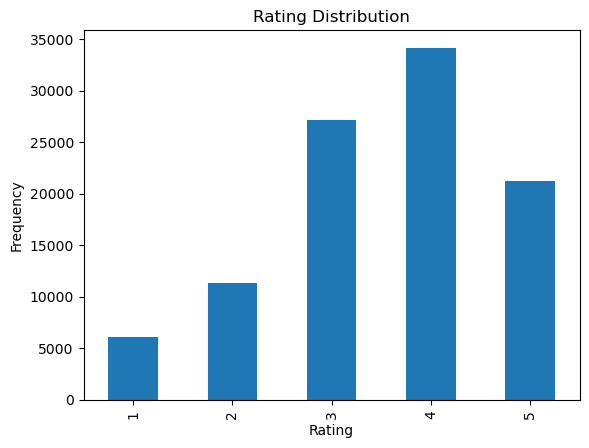

In [22]:
# Ratings distribution
ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


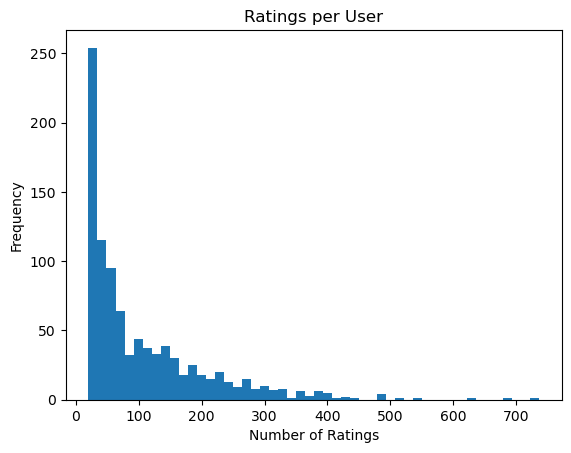

In [23]:
#Ratings per user
ratings_per_user = ratings.groupby('user_id').size().sort_index()
ratings_per_user.plot(kind='hist', bins=50)
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.show()

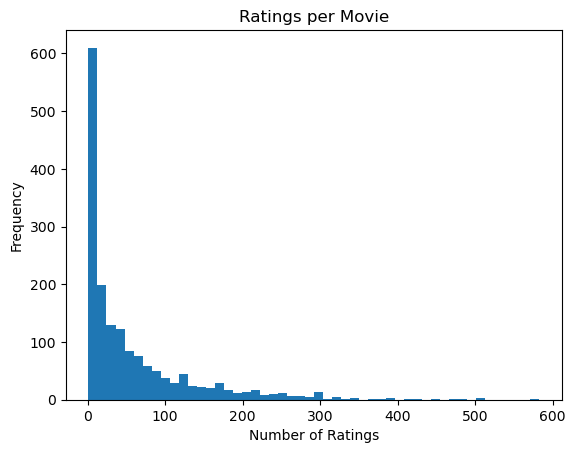

In [24]:
# Ratings per movie
ratings_per_movie = ratings.groupby('movie_id').size()
ratings_per_movie.plot(kind='hist', bins=50)
plt.title('Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.show()

In [25]:
# Basic statistics of ratings dataframe
print(ratings.isnull().sum())
print("*"*50)
print(ratings.info())
print("*"*50)
print(ratings.describe())

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64
**************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    99991 non-null  int64
 1   movie_id   99991 non-null  int64
 2   rating     99991 non-null  int64
 3   timestamp  99991 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB
None
**************************************************
            user_id      movie_id        rating     timestamp
count  99991.000000  99991.000000  99991.000000  9.999100e+04
mean     462.498305    425.544399      3.529868  8.835296e+08
std      266.612120    330.809824      1.125679  5.343572e+06
min        1.000000      1.000000      1.000000  8.747247e+08
25%      254.000000    175.000000      3.000000  8.794488e+08
50%      447.000000    322.000000      4.000000  8.828270e+08
75%      682.0000

In [26]:
print("Exploring the movies dataframe")
genre_columns=movies.columns[4:]
print("Genre columns => ",genre_columns)

Exploring the movies dataframe
Genre columns =>  Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


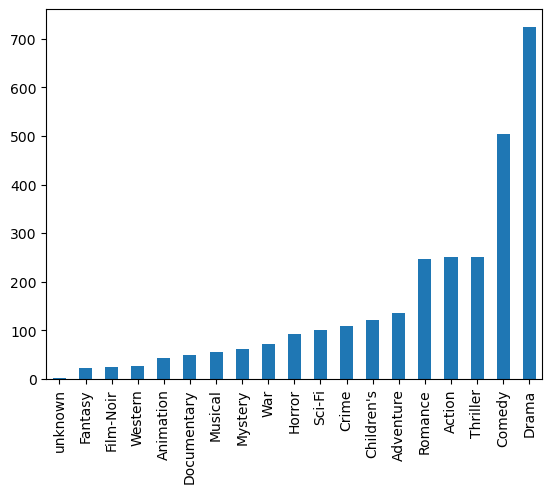

In [27]:
# Sum of movies in each genre (A movie can belong to several genre)
genre_counts = movies[genre_columns].sum().sort_values().plot(kind="bar")

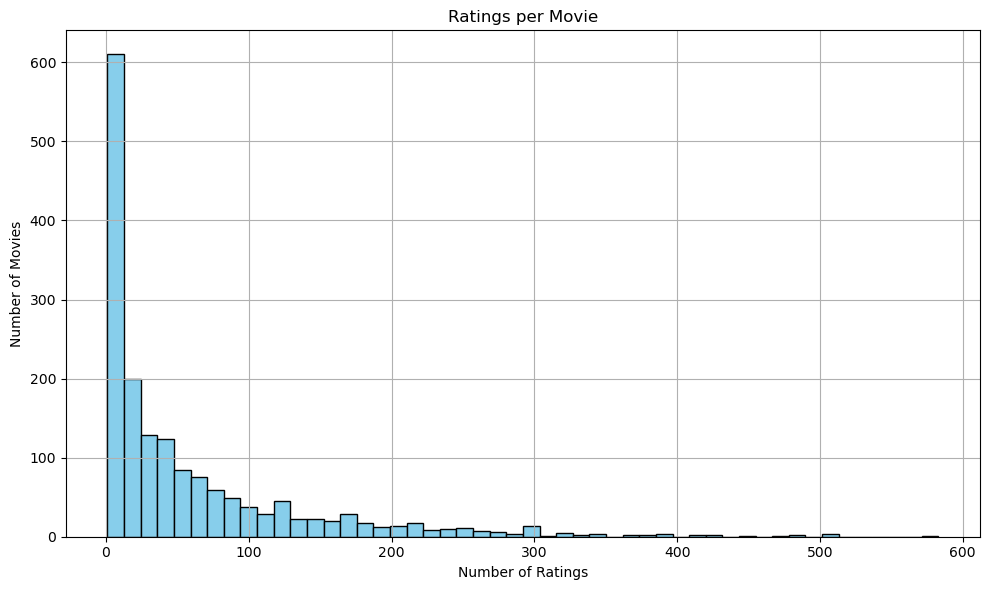

In [28]:
ratings_per_movie = ratings.groupby('movie_id').size()

plt.figure(figsize=(10,6))
ratings_per_movie.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Join with ratings count
ratings_count = ratings.groupby('movie_id').size().reset_index(name='count')
top_movies = ratings_count.sort_values(by='count', ascending=False).head(10)

# Merge to get titles
top_movies = pd.merge(top_movies, movies, on='movie_id')
print(top_movies[['title', 'count']])


                           title  count
0               Star Wars (1977)    583
1                 Contact (1997)    509
2                   Fargo (1996)    508
3      Return of the Jedi (1983)    507
4               Liar Liar (1997)    485
5    English Patient, The (1996)    481
6                  Scream (1996)    478
7               Toy Story (1995)    452
8           Air Force One (1997)    431
9  Independence Day (ID4) (1996)    429


In [30]:
# Merge ratings with movie titles
merged_df = pd.merge(ratings, movies, on='movie_id')

# Show first few rows
merged_df.head()

,user_id,movie_id,rating,timestamp,title,release_date,imdb_url,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
top_rated = merged_df['title'].value_counts().head(10)
print(top_rated)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


In [32]:
top_10 = merged_df['title'].value_counts().head(10)

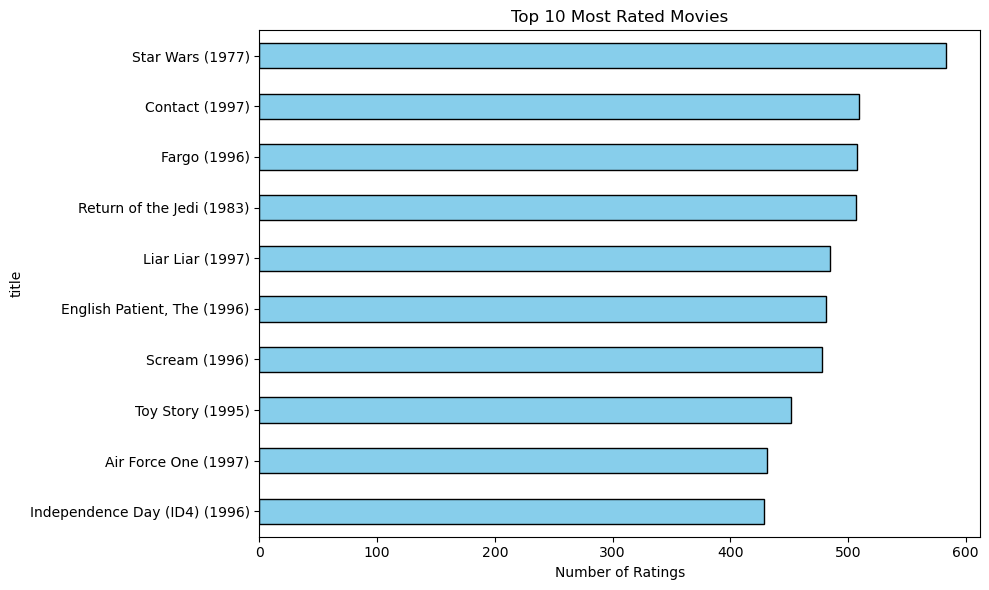

In [33]:
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most Rated Movies')
plt.gca().invert_yaxis()  # Most rated at top
plt.tight_layout()
plt.show()

In [34]:
#Feature Engineering – Ratings per Month

# 2. Convert timestamp to datetime
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')

# 3. Extract year-month (e.g., '2020-05')
ratings['year_month'] = ratings['datetime'].dt.to_period('M')

# 4. Count ratings per movie each month
monthly_counts = ratings.groupby(['movie_id', 'year_month']).size().reset_index(name='ratings_count')

# 5. Pivot to wide format (each movie, month as column)
monthly_pivot = monthly_counts.pivot(
    index='movie_id',
    columns='year_month',
    values='ratings_count'
).fillna(0)

# 6. (Optional) Add a feature: total ratings across all months
monthly_pivot['total_ratings'] = monthly_pivot.sum(axis=1)

feat = pd.merge(monthly_pivot.reset_index(), movies, on='movie_id')
print(feat.head())


   movie_id  1997-09  1997-10  1997-11  1997-12  1998-01  1998-02  1998-03  \
0         1     36.0     54.0    122.0     55.0     60.0     45.0     44.0   
1         2     10.0     15.0     26.0     19.0     17.0     18.0     14.0   
2         3      8.0     13.0     23.0     13.0     12.0      9.0      5.0   
3         4     21.0     30.0     51.0     21.0     27.0     20.0     21.0   
4         5     10.0      9.0     22.0      9.0     12.0      9.0      6.0   

   1998-04  total_ratings  ... Fantasy Film-Noir Horror  Musical  Mystery  \
0     36.0          452.0  ...       0         0      0        0        0   
1     12.0          131.0  ...       0         0      0        0        0   
2      7.0           90.0  ...       0         0      0        0        0   
3     18.0          209.0  ...       0         0      0        0        0   
4      9.0           86.0  ...       0         0      0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0     

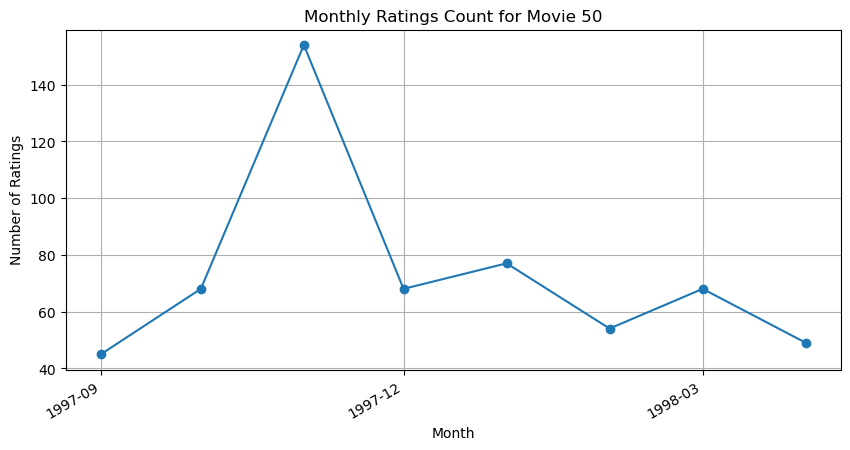

In [35]:
#Line Plot of Movie Ratings Over Time
# (Assuming 'monthly_counts' DataFrame from earlier)
# Example: plot ratings count over time for a single movie_id
movie_id = 50  # change as needed
ts = monthly_counts[monthly_counts.movie_id == movie_id]
ts.set_index('year_month', inplace=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts.index.to_timestamp(), ts['ratings_count'], marker='o')

ax.set_title(f'Monthly Ratings Count for Movie {movie_id}')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Ratings')

# Format x-axis ticks every 3 months
locator = mdates.MonthLocator(interval=3)
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

ax.grid(True)
plt.show()


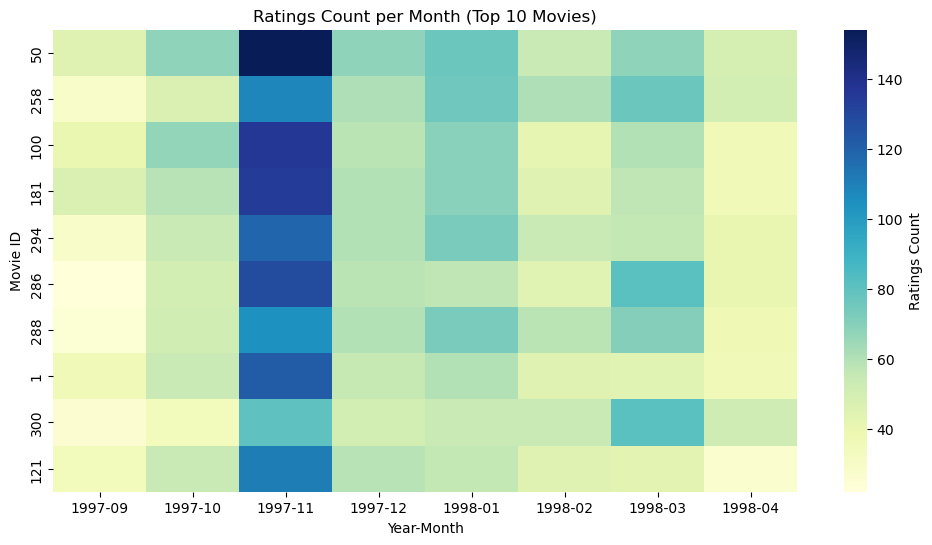

In [36]:
#Heatmap of Ratings by Movie and Time
# Pivot into matrix: movies x months
pivot = monthly_counts.pivot(
    index='movie_id',
    columns='year_month',
    values='ratings_count'
).fillna(0)

# (Optionally select top-10 most active movies for clarity)
top_movies = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot.loc[top_movies]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_top, cmap='YlGnBu', cbar_kws={'label': 'Ratings Count'})
plt.title('Ratings Count per Month (Top 10 Movies)')
plt.xlabel('Year-Month')
plt.ylabel('Movie ID')
plt.show()


IsolationForest outliers:       movie_id  rating_count  avg_rating  anomaly
0            1           452    3.878319       -1
6            7           392    3.798469       -1
49          50           583    4.358491       -1
55          56           394    4.060914       -1
63          64           283    4.445230       -1
97          98           390    4.289744       -1
99         100           508    4.155512       -1
116        117           378    3.693122       -1
120        121           429    3.438228       -1
126        127           413    4.283293       -1
171        172           367    4.204360       -1
173        174           420    4.252381       -1
180        181           507    4.007890       -1
221        222           365    3.660274       -1
236        237           384    3.710938       -1
257        258           509    3.803536       -1
284        286           481    3.656965       -1
286        288           478    3.441423       -1
292        294          

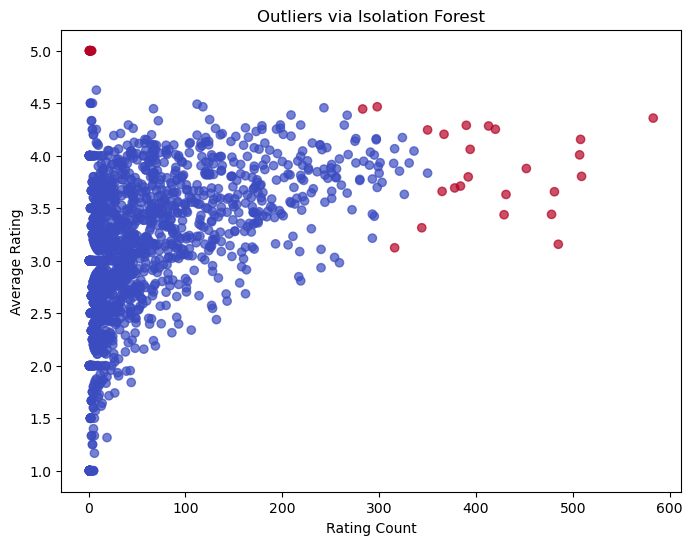

In [37]:
#Detecting Abnormal Movie Rating Patterns Using Isolation Forest.
from sklearn.ensemble import IsolationForest

# Build a feature df
features = merged_df.groupby('movie_id').agg({
    'rating': ['count', 'mean']
}).reset_index()
features.columns = ['movie_id', 'rating_count', 'avg_rating']

model = IsolationForest(contamination=0.02, random_state=42)
model.fit(features[['rating_count', 'avg_rating']])

features['anomaly'] = model.predict(features[['rating_count', 'avg_rating']])
outliers_iso = features[features['anomaly'] == -1]
print("IsolationForest outliers:", outliers_iso)

# Plot outliers
plt.figure(figsize=(8,6))
plt.scatter(features['rating_count'], features['avg_rating'], c=(features['anomaly']==-1), cmap='coolwarm', alpha=0.7)
plt.xlabel('Rating Count')
plt.ylabel('Average Rating')
plt.title('Outliers via Isolation Forest')
plt.show()


In [38]:
### Simple Item-Based Collaborative Filtering (Slope One)
from collections import defaultdict

# Build user→item ratings dict
user_ratings = defaultdict(dict)
for row in ratings.itertuples():
    user_ratings[row.user_id][row.movie_id] = row.rating

# Compute deviations and counts
dev, count = defaultdict(lambda: defaultdict(int)), defaultdict(lambda: defaultdict(int))
for u, items in user_ratings.items():
    for i, ri in items.items():
        for j, rj in items.items():
            if i != j:
                dev[i][j] += ri - rj
                count[i][j] += 1

# Average deviations
for i in dev:
    for j in dev[i]:
        dev[i][j] /= count[i][j]

# Predict function
def slope_one_predict(user_id, item):
    num, den = 0.0, 0
    for j, ruj in user_ratings[user_id].items():
        if item in dev[j]:
            num += (dev[j][item] + ruj) * count[j][item]
            den += count[j][item]
    return num / den if den else None

# Example: Predict ratings for a sample user
test_user = ratings.user_id.unique()[0]
preds = {item: slope_one_predict(test_user, item)
         for item in ratings.movie_id.unique()
         if item not in user_ratings[test_user]}
top_preds = sorted(preds.items(), key=lambda x: x[1] or 0, reverse=True)[:10]

print("Top 10 recommendations (item: predicted rating):", top_preds)



Top 10 recommendations (item: predicted rating): [(np.int64(1309), 8.0), (np.int64(599), 7.0), (np.int64(1621), 6.588235294117647), (np.int64(1659), 6.454545454545454), (np.int64(1678), 6.333333333333333), (np.int64(1304), 6.285714285714286), (np.int64(1308), 6.2727272727272725), (np.int64(1661), 6.2), (np.int64(1292), 6.111111111111111), (np.int64(1307), 6.090909090909091)]


In [40]:
### Matrix Factorization with Truncated SVD (NumPy & Scikit‑learn)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split train/test
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# Pivot to matrix
train_mat = train.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
test_mat = test.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
train_mat.head()


movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1671,1672,1673,1674,1675,1676,1678,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Factorize with truncated SVD
U, Sigma, VT = randomized_svd(train_mat.values, n_components=20, random_state=42)
Sigma_mat = np.diag(Sigma)

# Reconstruct train prediction matrix
pred_train = np.dot(np.dot(U, Sigma_mat), VT)
train_mat.head()
test_mat.head()
train_mat.shape
test_mat.shape

(943, 1410)

In [42]:
# Perform truncated SVD to reconstruct user–item ratings matrix (low-rank approximation)

# Split
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# Collect all users/items
users = sorted(ratings['user_id'].unique())
items = sorted(ratings['movie_id'].unique())

# Pivot training matrix
train_mat = train.pivot_table(index='user_id', columns='movie_id',
                              values='rating', fill_value=0).reindex(
    index=users, columns=items, fill_value=0
)

# Apply TruncatedSVD
tsvd = TruncatedSVD(n_components=20, random_state=42)
train_reduced = tsvd.fit_transform(train_mat)

# Reconstruct full matrix
pred_matrix = np.dot(train_reduced, tsvd.components_)

# Wrap into DataFrame
pred_ratings = pd.DataFrame(pred_matrix, index=users, columns=items)

# Evaluate on test
preds, truths = [], []
for u, i, true_val in test[['user_id', 'movie_id', 'rating']].itertuples(index=False):
    preds.append(pred_ratings.at[u, i])
    truths.append(true_val)

rmse = np.sqrt(mean_squared_error(truths, preds))
mae = mean_absolute_error(truths, preds)
print(f"SVD RMSE = {rmse:.3f}, MAE = {mae:.3f}")


SVD RMSE = 2.648, MAE = 2.375


Content Based Filtering

In [43]:
movies.columns

Index(['movie_id', 'title', 'release_date', 'imdb_url', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [44]:
genre_columns = movies.columns[4:]
movies['genre'] = movies[genre_columns].apply(
    lambda row: '|'.join([genre for genre in genre_columns if row[genre] == 1]),
    axis=1
)
movies=movies[['movie_id', 'title', 'imdb_url','genre']]


In [45]:
movies.head()

,movie_id,title,imdb_url,genre
0,1,Toy Story (1995),http://us.imdb.com/M/title-exact?Toy%20Story%2...,Animation|Children's|Comedy
1,2,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action|Adventure|Thriller
2,3,Four Rooms (1995),http://us.imdb.com/M/title-exact?Four%20Rooms%...,Thriller
3,4,Get Shorty (1995),http://us.imdb.com/M/title-exact?Get%20Shorty%...,Action|Comedy|Drama
4,5,Copycat (1995),http://us.imdb.com/M/title-exact?Copycat%20(1995),Crime|Drama|Thriller


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(token_pattern=r"(?u)\b[\w-]+\b")  
tfidf_matrix = tfidf.fit_transform(movies['genre'])

In [47]:
from sklearn.metrics.pairwise import linear_kernel

def recommend_content_based(title, tfidf_matrix, movies_df, top_n=5):
    # Create a reverse mapping from title to index
    indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

    if title not in indices:
        return "Movie not found."

    # Get the index of the movie that matches the title
    idx = indices[title]

    # Compute cosine similarity between this movie and all others
    cosine_sim = linear_kernel(tfidf_matrix[idx:idx+1], tfidf_matrix).flatten()

    # Get top N most similar movies (excluding the movie itself)
    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return movies_df[['title', 'genre', 'imdb_url']].iloc[movie_indices]


In [48]:
recommend_content_based("Toy Story (1995)", tfidf_matrix, movies)

,title,genre,imdb_url
421,Aladdin and the King of Thieves (1996),Animation|Children's|Comedy,http://us.imdb.com/M/title-exact?Aladdin%20and...
101,"Aristocats, The (1970)",Animation|Children's,"http://us.imdb.com/M/title-exact?Aristocats,%2..."
403,Pinocchio (1940),Animation|Children's,http://us.imdb.com/M/title-exact?Pinocchio%20(...
624,"Sword in the Stone, The (1963)",Animation|Children's,http://us.imdb.com/M/title-exact?Sword%20in%20...
945,"Fox and the Hound, The (1981)",Animation|Children's,http://us.imdb.com/M/title-exact?Fox%20and%20t...
